# The artisanal mining landscape in DRC 
Data is from the International Peace Information Service and filtered to only include the mines visited by investigators in Democratic Republic of Congo between October 2020 and March 2023.

An estimated 1 million miners toil as informal, artisanal miners in DRC, a country rich in resources but plagued by over 100 armed groups. Access to the artisanal mining sites — primarily gold, tin and coltan — is a source of conflict among the armed groups and often their main source of income. Because DRC's army (FARDC), police (PNC) and mining police (PMH) are often present at the mines (and involved in the corruption as well), IPIS includes these state services in the armed group category.

I analyzed the data from the mines visited by IPIS between October 2020 and March 2023 to look for correlations between the presence of armed groups, the use of mercury and the use of child labor. See my findings below.

Find the interactive map from IPIS and explore their database at the links below.

https://www.ipisresearch.be/mapping/webmapping/drcongo/v6/#-3/28/5/1/1/

https://ipisresearch-dashboard.shinyapps.io/open_data_app/

In [4]:
import requests

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [8]:
pd.read_csv("new_DRC_mining.csv")
df = pd.read_csv("new_DRC_mining.csv")

In [9]:
df.shape

(1048, 18)

## How many mines have no armed group presence?

In [6]:
# Check if all three armed group columns are empty
no_armed_group_count = len(df[(df['armed_group1'].isnull()) & (df['armed_group2'].isnull()) & (df['armed_group3'].isnull())])

# Calculate the percentage of mines without armed group presence
total_mines_count = len(df)
mines_with_armed_group = total_mines_count - no_armed_group_count
percentage_with_armed_group = (mines_with_armed_group / total_mines_count) * 100

# Print the findings
print("Percentage of mines with armed group presence:", percentage_with_armed_group)
print("Percentage of mines without armed group presence:", 100 - percentage_with_armed_group)

Percentage of mines with armed group presence: 48.37786259541985
Percentage of mines without armed group presence: 51.62213740458015


## Where are armed groups most prominent in mining?

In [7]:
# Count the number of mines with and without an armed group presence for each province
grouped_df = df.groupby('province')['armed_group1'].apply(lambda x: pd.notnull(x).sum())
total_mines_df = df['province'].value_counts()

# Save the data as a CSV file
mines_presence_df = pd.concat([grouped_df, total_mines_df], axis=1, keys=['With armed group presence', 'Total mines'])
mines_presence_df.to_csv('mines_presence.csv')

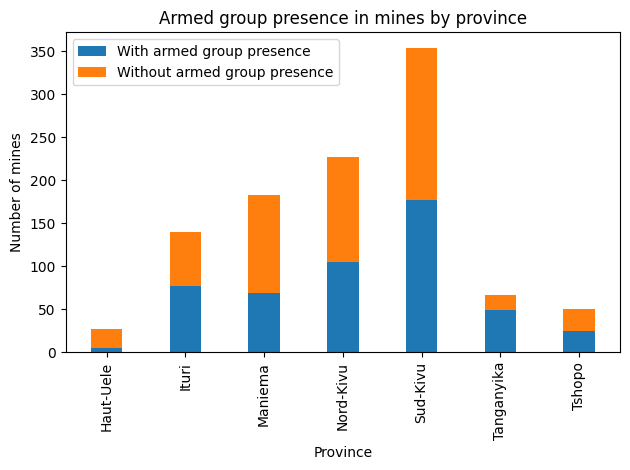

In [8]:
# Count the number of mines with and without an armed group presence for each province
grouped_df = df.groupby('province')['armed_group1'].apply(lambda x: pd.notnull(x).sum())
total_mines_df = df['province'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
width = 0.4
x = range(len(grouped_df))
ax.bar(x, grouped_df, width, label='With armed group presence')
ax.bar(x, total_mines_df - grouped_df, width, bottom=grouped_df, label='Without armed group presence')

# Customize the graph
ax.set_xticks(x)
ax.set_xticklabels(grouped_df.index, rotation=90)
ax.set_xlabel('Province')
ax.set_ylabel('Number of mines')
ax.set_title('Armed group presence in mines by province')
ax.legend()

# Show the graph
plt.tight_layout()
plt.show()

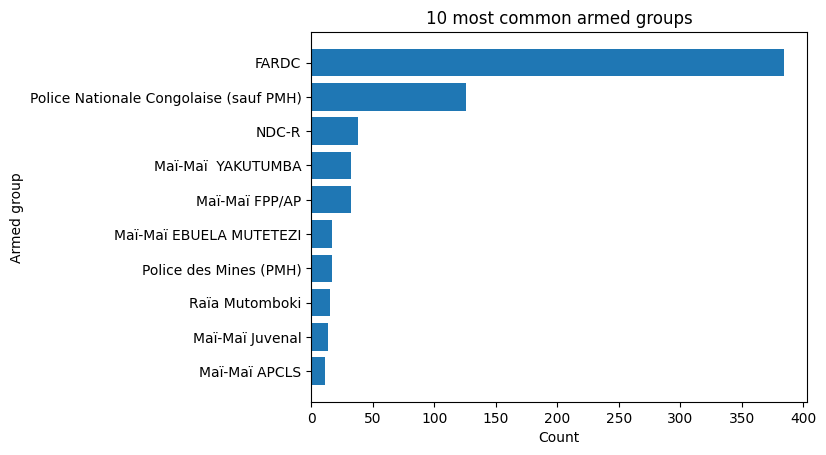

In [21]:
# Combine the three armed group columns into a single series
armed_groups = pd.concat([df['armed_group1'], df['armed_group2'], df['armed_group3']])

# Count the occurrences of each armed group
armed_group_counts = armed_groups.value_counts().head(10)

# Plot the horizontal bar graph
plt.barh(armed_group_counts.index, armed_group_counts.values)
plt.xlabel('Count')
plt.ylabel('Armed group')
plt.title('10 most common armed groups')
plt.gca().invert_yaxis()
plt.show()

In [22]:
# Create a df from the armed group counts
data = pd.DataFrame({'Armed group': armed_group_counts.index, 'Count': armed_group_counts.values})

# Save the data as a CSV file
data.to_csv('armed_group_counts.csv', index=False)

### It seems like the national army and the police are the most common armed groups present at the mines. How often does the reported armed group belong to a state agency like the army, the police or the mining police?

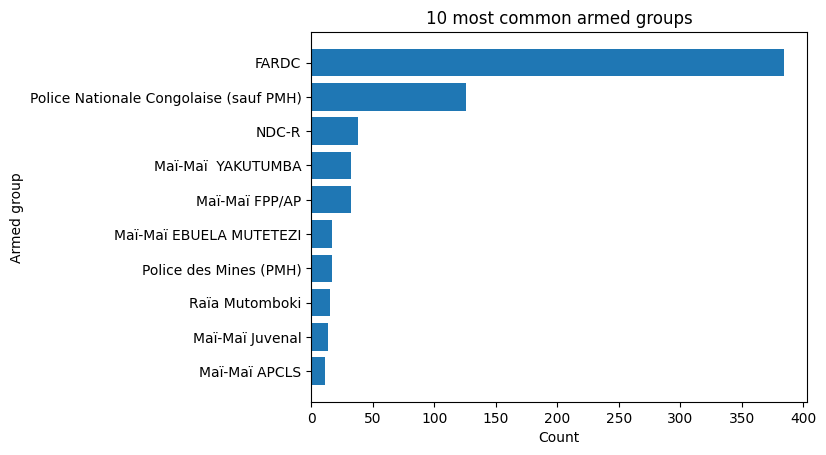

When there is an armed presence, it's the army or the police 34.63740458015267 percent of the time.


In [26]:
# # Of these mines, filter to show only those where the army or police are present.
# state_armed_groups = armed_groups[armed_groups[['armed_group1']].isin(['FARDC', 'PMH', 'PNC']).any(axis=1)]

# # Calculate the percentage
# percentage = (len(state_armed_groups) / len(armed_groups)) * 100

# print("When there is an armed presence,", percentage, "of the time, it's the army or the police.")

# Combine the three armed group columns into a single series
armed_groups = pd.concat([df['armed_group1'], df['armed_group2'], df['armed_group3']])

# Count the occurrences of each armed group
armed_group_counts = armed_groups.value_counts().head(10)

# Plot the horizontal bar graph
plt.barh(armed_group_counts.index, armed_group_counts.values)
plt.xlabel('Count')
plt.ylabel('Armed group')
plt.title('10 most common armed groups')
plt.gca().invert_yaxis()
plt.show()

# Create a df from the armed group counts
data = pd.DataFrame({'Armed group': armed_group_counts.index, 'Count': armed_group_counts.values})

# Save the data as a CSV file
data.to_csv('armed_group_counts.csv', index=False)

# Define armed_group_presence DataFrame by combining the armed group columns
armed_group_presence = pd.concat([df['armed_group1'], df['armed_group2'], df['armed_group3']], axis=1)

# Filter for mines where the army or police are present
state_armed_groups = armed_group_presence[armed_group_presence.isin(['FARDC', 'PMH', 'PNC']).any(axis=1)]

# Calculate the percentage
percentage = (len(state_armed_groups) / len(armed_group_presence)) * 100

print("When there is an armed presence, it's the army or the police", percentage, "percent of the time.")

### So, about 71% of the time an armed group is present at an artisanal mining site in DRC, it is a state force. Why is this? What's going on?

The U.S. Department of State's 2022 report on human rights in DRC provides some insight:

"Artisanal mining remained predominantly informal, illicit, and strongly linked to both armed groups and certain elements of the FARDC [the army]. Government officials were often complicit in the smuggling of artisanal mining products, particularly gold, into Uganda and Rwanda. The law prohibits the FARDC from engaging in mineral trade, but the government did not effectively enforce the law. Criminal involvement by some FARDC units and armed groups included protection rackets, extortion, and theft. The illegal trade in minerals was both a symptom and a cause of weak governance. It illegally financed armed groups and individual elements of the SSF [state security forces] and sometimes generated revenue for traditional authorities and local and provincial governments. A June report by the UN Group of Experts reported that FARDC members trafficked and profited from untagged coltan in North Kivu Province and illegally mined and taxed gold in Ituri Province. Individual FARDC commanders also sometimes appointed civilians to manage their interests at mining sites covertly."

Source: https://www.state.gov/wp-content/uploads/2023/03/415610_CONGO-DEM-REP-2022-HUMAN-RIGHTS-REPORT.pdf

### Are state forces (FARDC, PNC or PMH) ever present alongside a local armed group?

In [ ]:
# Create a group for when the army or police are not the primary armed group
armed_group1_check = ~df['armed_group1'].isin(['FARDC', 'PMH', 'PNC'])

# Create a group for when the army or police are a secondary armed group
armed_group2_check = df['armed_group2'].isin(['FARDC', 'PMH', 'PNC'])

filtered_df = df[armed_group1_check & armed_group2_check]

len(filtered_df)

In [ ]:
three_mines_info = filtered_df[['name', 'province', 'mineral1', 'armed_group1', 'armed_group2']]
print(three_mines_info)

### Yes, at these three gold mines. Interesting...

In [ ]:
print("At these three mines, a state AND local armed group were both present:\n\n", three_mines_info)

### Ok, so there's lots of armed groups and they include corrupt state elements like the army. But what are they mining?

In [ ]:
# Show the distribution of minerals across all DRC mines
mineral_counts = df['mineral1'].value_counts()

# Create a DataFrame from the mineral counts
data = pd.DataFrame({'Mineral': mineral_counts.index, 'Count': mineral_counts.values})

# Save the data as a CSV file
data.to_csv('mineral_distribution.csv', index=False)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(mineral_counts, labels=mineral_counts.index, autopct='%1.1f%%')
plt.title('Distribution of minerals in DRC mines')
plt.axis('equal')

plt.show()

### Looks like 77% of the mines are gold, 16% are cassiterite (tin), 5% are coltan, 1% are wolframite and there are a few other mixed mines. Do armed groups have more interest in a particular mineral?

In [ ]:
# Searching the mines with armed group presence, count the occurrence of each mineral
mineral_counts = armed_group_presence['mineral1'].value_counts()

# Select the most common minerals
most_common_minerals = mineral_counts

# Create a DataFrame from the mineral counts
data = pd.DataFrame({'Mineral': most_common_minerals.index, 'Count': most_common_minerals.values})

# Save the data as a CSV file
data.to_csv('mineral_distribution2.csv', index=False)

# Plot the pie chart
plt.pie(most_common_minerals, labels=most_common_minerals.index, autopct='%1.1f%%')
plt.title("Distribution of minerals at mines with an armed presence")
plt.axis('equal')

# Display the chart
plt.show()

Armed groups seem to have a slight preference for gold mines. 

## Mercury usage

### IPIS also recorded when mercury was used at a mining site, which has an extremely harmful impact on the miners and on the surrounding environment.  Where is mercury most likely to be used?

In [ ]:
# Group by mineral and calculate the likelihood of mercury usage
mineral_mercury_likelihood = df.groupby('mineral1')['mercury'].apply(lambda x: (x == 'Observed').mean() * 100)

print(mineral_mercury_likelihood)

Mercury was used at about 39% of gold mines and 2% of cassiterite mines.

### If mercury is primarily used in gold mining, which provinces have the most gold mines?

In [ ]:
# Filter for 'or' (gold) mines
or_mines = df[df['mineral1'] == 'Or']

# Count the number of 'or' mines in each province
province_counts = or_mines['province'].value_counts().sort_values(ascending=True)

# Save the data as a CSV file
province_counts.to_csv('gold_mines_by_province.csv', header=['Number of gold mines'], index_label='Province')

# Plot the bar chart
plt.barh(province_counts.index, province_counts.values)
plt.xlabel('Province')
plt.ylabel('Number of gold mines')
plt.title('Number of gold mines in each province')
plt.show()

South Kivu, North Kivu, Ituri and Maniema provinces, respectively, have the most gold mines.

### Does the use of mercury follow that pattern (is it most common in South Kivu, North Kivu, Ituri and Maniema, respectively)?

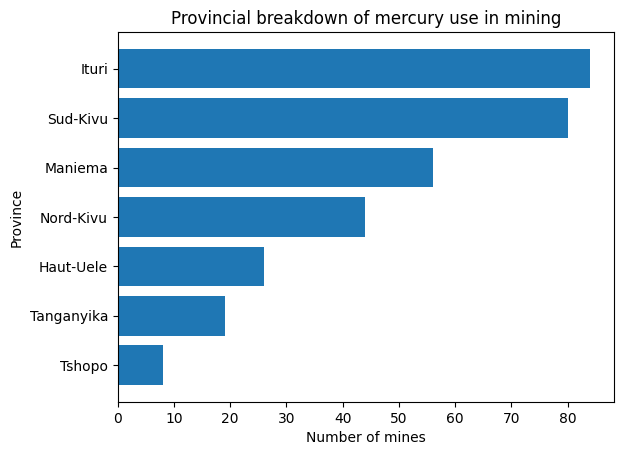

In [14]:
# Filter for mines where mercury is observed
mercury_observed = df[df['mercury'] == 'Observed']

# Count the number of mines where mercury was observed in each province
province_counts = mercury_observed['province'].value_counts().sort_values(ascending=True)

# Save the data as a CSV file
province_counts.to_csv('mercury_mines2.csv', header=['Number of mines'])

# Plot the horizontal bar chart
plt.barh(province_counts.index, province_counts.values)
plt.xlabel('Number of mines')
plt.ylabel('Province')
plt.title('Provincial breakdown of mercury use in mining')
plt.show()

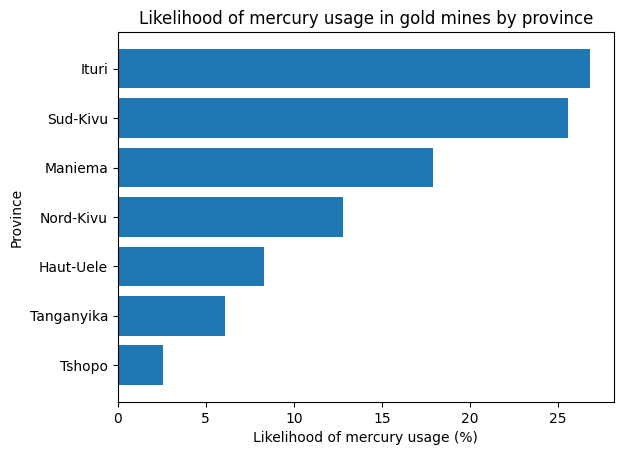

In [13]:
# Filter for gold mines and mercury usage
gold_mercury_observed = df[(df['mineral1'] == 'Or') & (df['mercury'] == 'Observed')]

# Calculate the provincial likelihood of mercury usage for gold mines
province_likelihood = gold_mercury_observed['province'].value_counts(normalize=True) * 100

# Sort the provinces in descending order of likelihood
province_likelihood = province_likelihood.sort_values(ascending=True)

# Save the data as a CSV file
province_likelihood.to_csv('province_likelihood.csv', header=['Likelihood of mercury usage (%)'])

# Plot the horizontal bar chart
plt.barh(province_likelihood.index, province_likelihood.values)
plt.xlabel('Likelihood of mercury usage (%)')
plt.ylabel('Province')
plt.title('Likelihood of mercury usage in gold mines by province')
plt.show()

No. Because Ituri and Maniema provinces jumped ahead in this latest analysis, we can conclude that mercury is disproportionately used in those two provinces.

### Does the presence of armed groups relate to the use of mercury?

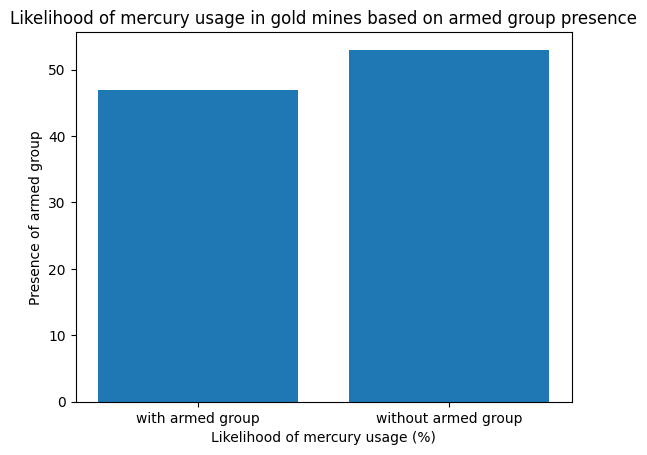

In [12]:
# Filter for gold mines and the presence of an armed group
gold_armed_group = df[(df['mineral1'] == 'Or') & df['armed_group1'].notnull()]

# Calculate the likelihood of mercury usage for gold mines with and without armed group presence
with_armed_group = gold_armed_group[gold_armed_group['mercury'] == 'Observed']
without_armed_group = gold_armed_group[gold_armed_group['mercury'] != 'Observed']

likelihood_with_armed_group = (with_armed_group.shape[0] / gold_armed_group.shape[0]) * 100
likelihood_without_armed_group = (without_armed_group.shape[0] / gold_armed_group.shape[0]) * 100

# Create a bar chart
plt.bar(['with armed group', 'without armed group'], [likelihood_with_armed_group, likelihood_without_armed_group])
plt.xlabel('Likelihood of mercury usage (%)')
plt.ylabel('Presence of armed group')
plt.title('Likelihood of mercury usage in gold mines based on armed group presence')
plt.show()

Mercury usage is slightly more likely at mines where armed groups are not present, but this is probably not statistically significant.